<a href="https://colab.research.google.com/github/Swarn36/Pandas_excercise/blob/main/Tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# print the graphs in the notebook
%matplotlib inline

# set seaborn style to white
sns.set_style("darkgrid")

In [3]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'
tips = pd.read_csv(url)

tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
del tips['Unnamed: 0']

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips.groupby(['sex', 'time']).sum()

<ipython-input-8-14ed931f774c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby(['sex', 'time']).sum()


total_bill     tip  size
sex    time                            
Female Dinner      999.08  156.11   128
       Lunch       571.87   90.40    86
Male   Dinner     2661.22  389.96   335
       Lunch       595.60   95.11    78

In [9]:
tips.sex.value_counts(normalize=True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

In [29]:
tips.day.value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [30]:
tips[(tips['day'] == 'Fri') & (tips['sex'] == 'Female')]['tip'].mean()

2.781111111111111

In [32]:
tips[tips['day'] == 'Fri']['sex'].value_counts(normalize=True)

Male      0.526316
Female    0.473684
Name: sex, dtype: float64

In [10]:
tips.groupby(['smoker', 'time'])['sex'].value_counts(normalize=True)

smoker  time    sex   
No      Dinner  Male      0.726415
                Female    0.273585
        Lunch   Female    0.555556
                Male      0.444444
Yes     Dinner  Male      0.671429
                Female    0.328571
        Lunch   Male      0.565217
                Female    0.434783
Name: sex, dtype: float64

<Axes: xlabel='smoker', ylabel='count'>

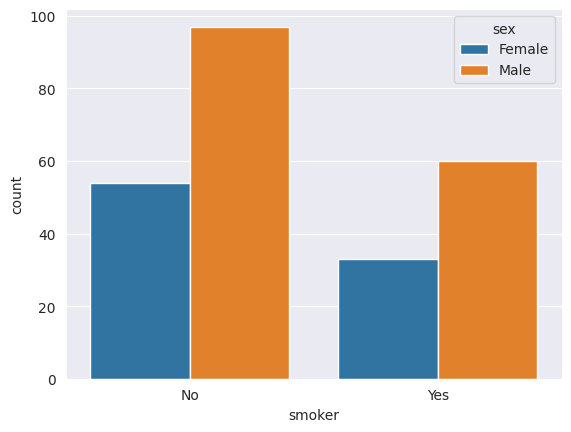

In [13]:
sns.countplot(x = "smoker", hue = "sex", data = tips)

<Axes: xlabel='time', ylabel='count'>

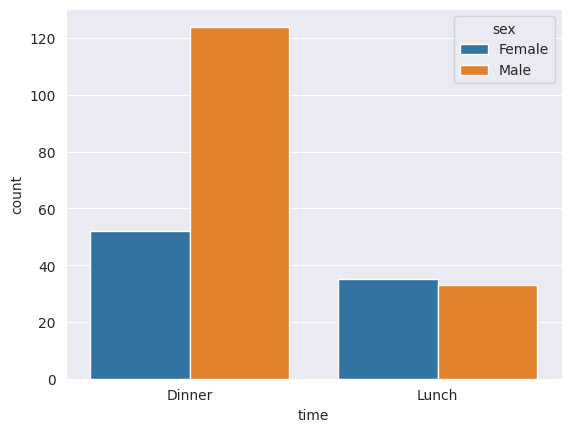

In [14]:
sns.countplot(x = "time", hue = "sex", data = tips)

In [20]:
tips.groupby('sex')['tip'].value_counts(normalize=True)

sex     tip  
Female  2.00     0.126437
        3.00     0.080460
        2.50     0.057471
        3.50     0.057471
        1.50     0.045977
                   ...   
Male    6.70     0.006369
        6.73     0.006369
        7.58     0.006369
        9.00     0.006369
        10.00    0.006369
Name: tip, Length: 139, dtype: float64

<Axes: xlabel='sex', ylabel='count'>

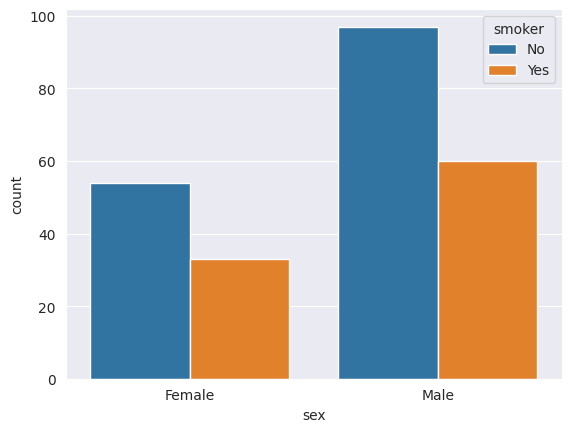

In [23]:
sns.countplot(x = "sex", hue = "smoker", data = tips)

<Axes: xlabel='time', ylabel='tip'>

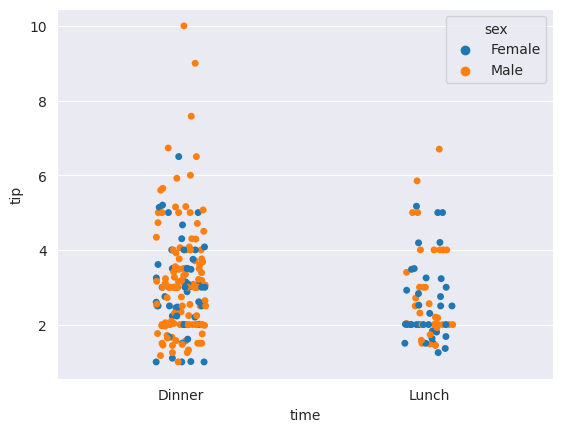

In [28]:
sns.stripplot(x = "time", y = "tip", hue = "sex", data = tips, jitter = True)

<ipython-input-7-ea4576c08ec1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ttbill = sns.distplot(tips.total_bill)


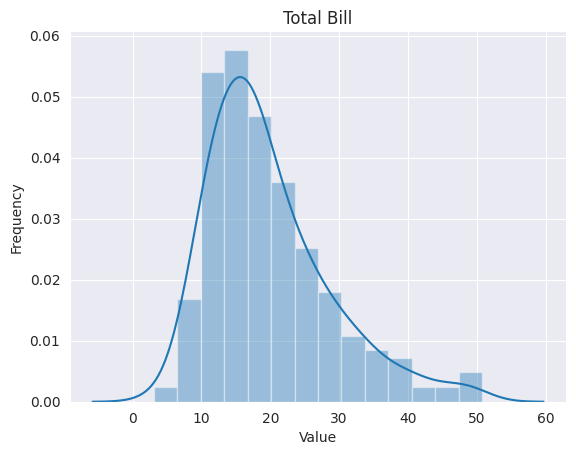

In [7]:
# create histogram
ttbill = sns.distplot(tips.total_bill)

# set lables and titles
ttbill.set(xlabel = 'Value', ylabel = 'Frequency', title = "Total Bill")

# take out the right and upper borders
sns.despine()

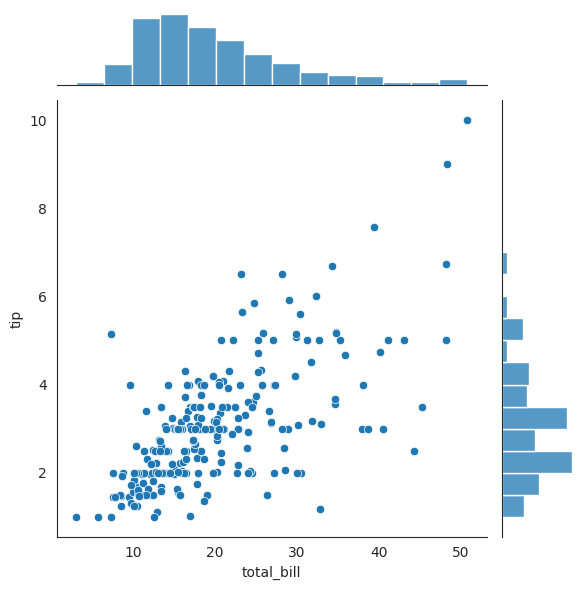

In [6]:
sns.jointplot(x ="total_bill", y ="tip", data = tips)

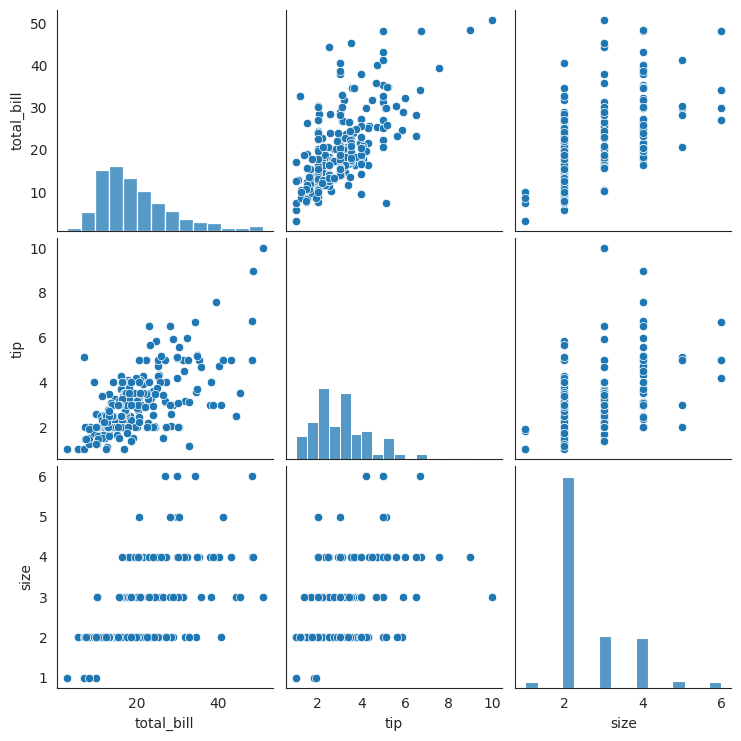

In [7]:
sns.pairplot(tips)

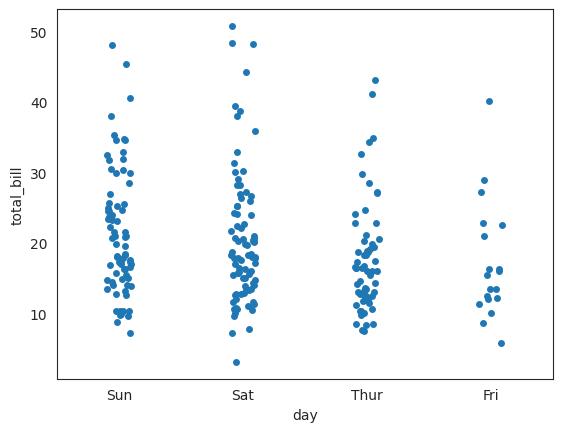

In [8]:
sns.stripplot(x = "day", y = "total_bill", data = tips, jitter = True)

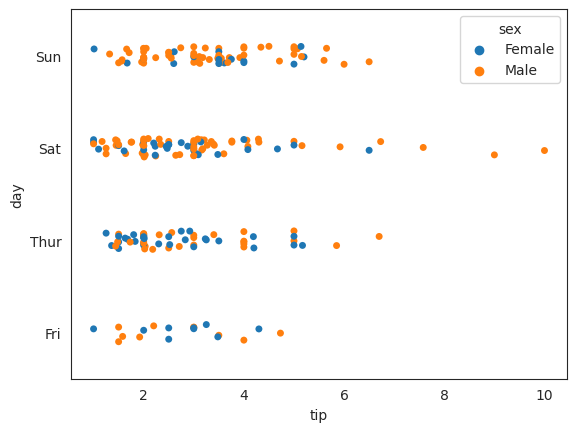

In [9]:
sns.stripplot(x = "tip", y = "day", hue = "sex", data = tips, jitter = True)

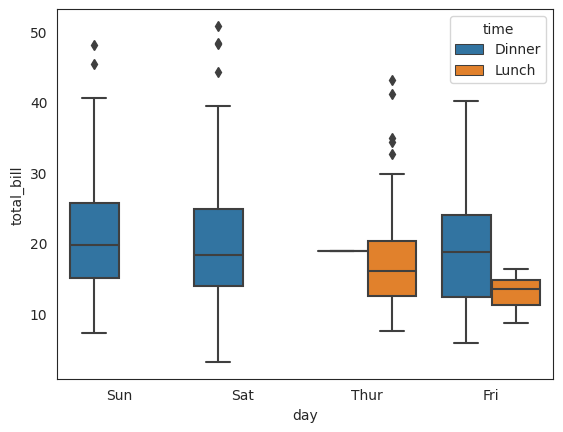

In [10]:
sns.boxplot(x = "day", y = "total_bill", hue = "time", data = tips)

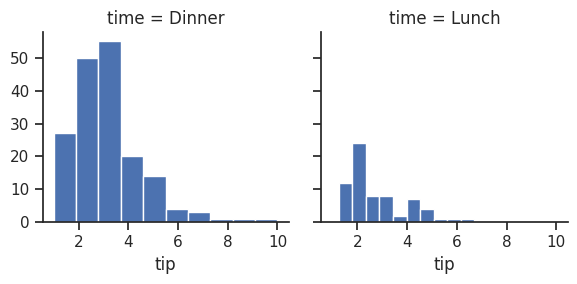

In [12]:
# better seaborn style
sns.set(style = "ticks")

# creates FacetGrid
g = sns.FacetGrid(tips, col = "time")
g.map(plt.hist, "tip")

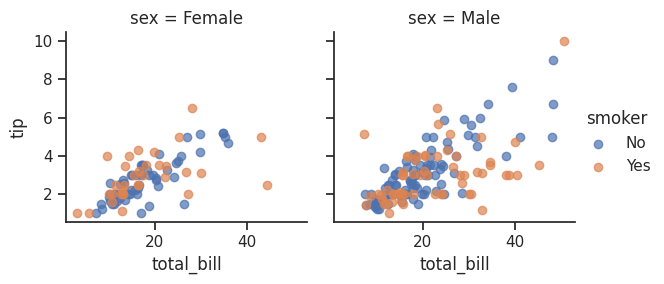

In [13]:
g = sns.FacetGrid(tips, col = "sex", hue = "smoker")
g.map(plt.scatter, "total_bill", "tip", alpha =.7)

g.add_legend()

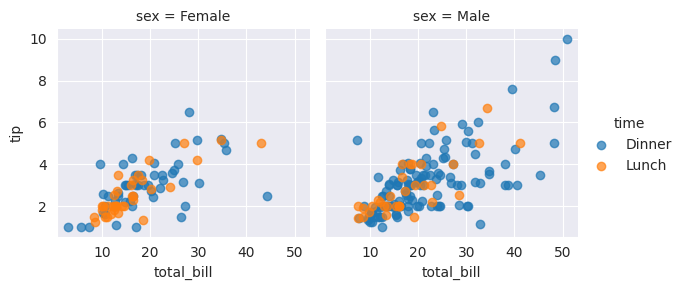

In [33]:
g = sns.FacetGrid(tips, col = "sex", hue = "time")
g.map(plt.scatter, "total_bill", "tip", alpha =.7)

g.add_legend()

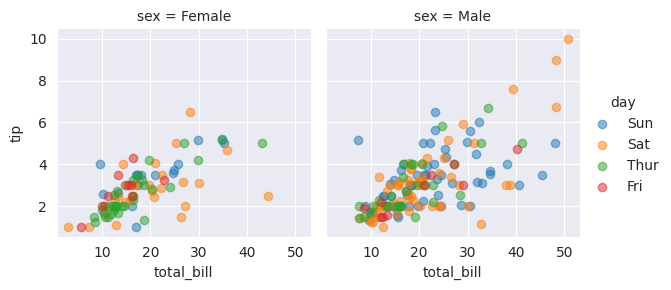

In [34]:
g = sns.FacetGrid(tips, col = "sex", hue = "day")
g.map(plt.scatter, "total_bill", "tip", alpha =.5)

g.add_legend()